In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
plt.rcParams['text.usetex'] = False
import pandas as pd
import sqlite3
from plotter import *
import glob, os
import seaborn as sb

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [3]:
path = 'simulations/illinois/least_cost_RE_sensitivity/data_files/*.sqlite'
data_files = glob.glob(path, recursive=True)
data_files.sort()
data_files.append('simulations/illinois/data_files/IL_CC30_52.sqlite')
data_files

['simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W0_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W1_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W2_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W3_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W4_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W5_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W6_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W7_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W8_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S0_W9_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S1_W0_52.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S1_W1_52.s

In [4]:
region = 'IL'
comm = 'ELC'
frames = []
for file in data_files:
    conn = sqlite3.connect(file)
    df = get_annual_capacity(conn, region, comm)
    final_year = df[df.index==2050]
    final_year['Objective_Value'] = get_objective(conn)
    frames.append(final_year)
df = pd.concat(frames)

<ipython-input-4-310931bd8ef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_year['Objective_Value'] = get_objective(conn)


In [5]:
df.fillna(0, inplace=True)
df

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
year,,,,,,,,
2050,2255.6,10705.351,688.8,14933.788,12420.0,10009.8280,0.0000,132315.601802
2050,2255.6,12528.168,688.8,13008.726,12420.0,12543.4530,4882.7820,132232.727857
2050,2255.6,11891.679,688.8,14125.989,12420.0,11435.9210,1603.1760,132830.508005
2050,2255.6,12008.590,688.8,13928.680,12420.0,8906.8875,3452.6736,132235.847781
2050,2255.6,10705.776,688.8,14933.788,12420.0,10008.2380,0.0000,132980.314790
...,...,...,...,...,...,...,...,...
2050,2255.6,10532.664,688.8,12799.283,12420.0,22881.5600,1807.1624,131928.261316
2050,2255.6,11351.299,688.8,11687.357,12420.0,25711.7600,3847.3106,131393.141364
2050,2255.6,10631.537,688.8,12665.892,12420.0,23029.3530,2197.0466,131585.051766


In [6]:
df.describe()

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
count,1.010000e+02,101.000000,1.010000e+02,101.000000,101.0,101.000000,101.000000,101.000000
mean,2.255600e+03,9693.864853,6.888000e+02,13450.369415,12420.0,17095.868965,2374.171636,131593.103178
std,4.113139e-12,1727.024659,1.371046e-12,1146.954356,0.0,4142.394698,2503.428181,1189.482685
min,2.255600e+03,6234.228800,6.888000e+02,9954.084900,12420.0,8906.887500,0.000000,127976.360033
25%,2.255600e+03,8366.433900,6.888000e+02,12665.892000,12420.0,14281.231000,298.092330,130683.816954
50%,2.255600e+03,9528.106000,6.888000e+02,13638.726000,12420.0,16903.992000,1807.162400,131579.249009
75%,2.255600e+03,10705.776000,6.888000e+02,14466.730000,12420.0,20157.881000,3833.984400,132314.036359
max,2.255600e+03,14066.769000,6.888000e+02,14933.788000,12420.0,26230.806000,10949.873000,134338.422226


In [10]:
techs = ['COAL_CONV',
 'LI_BATTERY',
 'NATGAS_CONV',
 'NUCLEAR_CONV',
 'SOLAR_FARM',
 'WIND_FARM',
 'NUCLEAR_ADV']

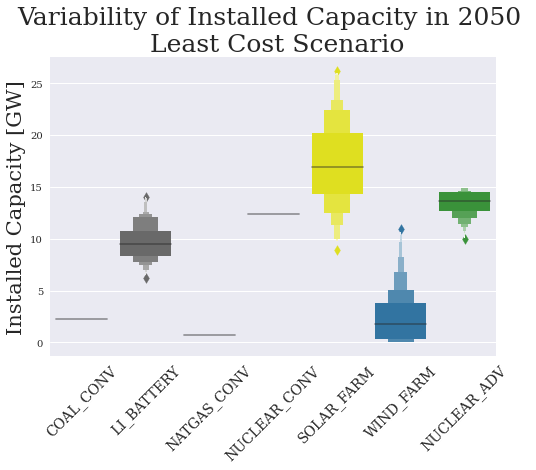

In [44]:
# plt.style.use('seaborn')
plt.figure.figsize = (12,9)
# (df[techs]/1000).boxplot()
sb.boxenplot(data=(df[techs]/1000), palette=elc_colors)

plt.title('Variability of Installed Capacity in 2050 \n Least Cost Scenario', fontsize=25)
plt.ylabel('Installed Capacity [GW]', fontsize=21)
plt.xticks(fontsize=14, rotation=45)
plt.show()

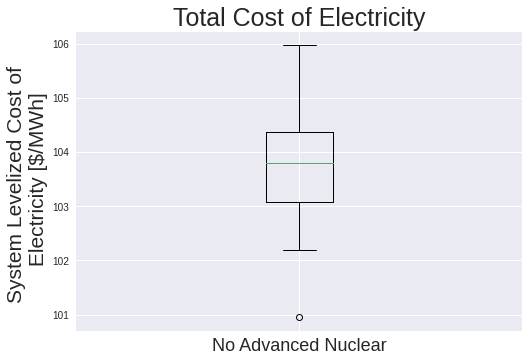

In [12]:
demand = 1267698.8
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
plt.boxplot(df['Objective_Value']/demand*1000)

plt.title('Total Cost of Electricity', fontsize=25)
plt.ylabel('System Levelized Cost of \n Electricity [$/MWh]', fontsize=21)
plt.xticks([1],['No Advanced Nuclear'],fontsize=18)
plt.show()

In [24]:
(df['Objective_Value']).to_csv('data/objective_value_LC.csv')

In [13]:
df = df.reset_index().drop(columns='year')

<AxesSubplot:>

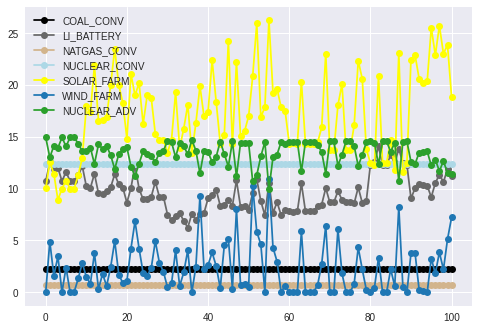

In [14]:
(df[techs]/1000).plot(marker='o', color=elc_colors)

The plot above suggests that biomass is useful when there is slightly less penetration of VREs. Biomass serves as baseload power and is relatively inflexible.

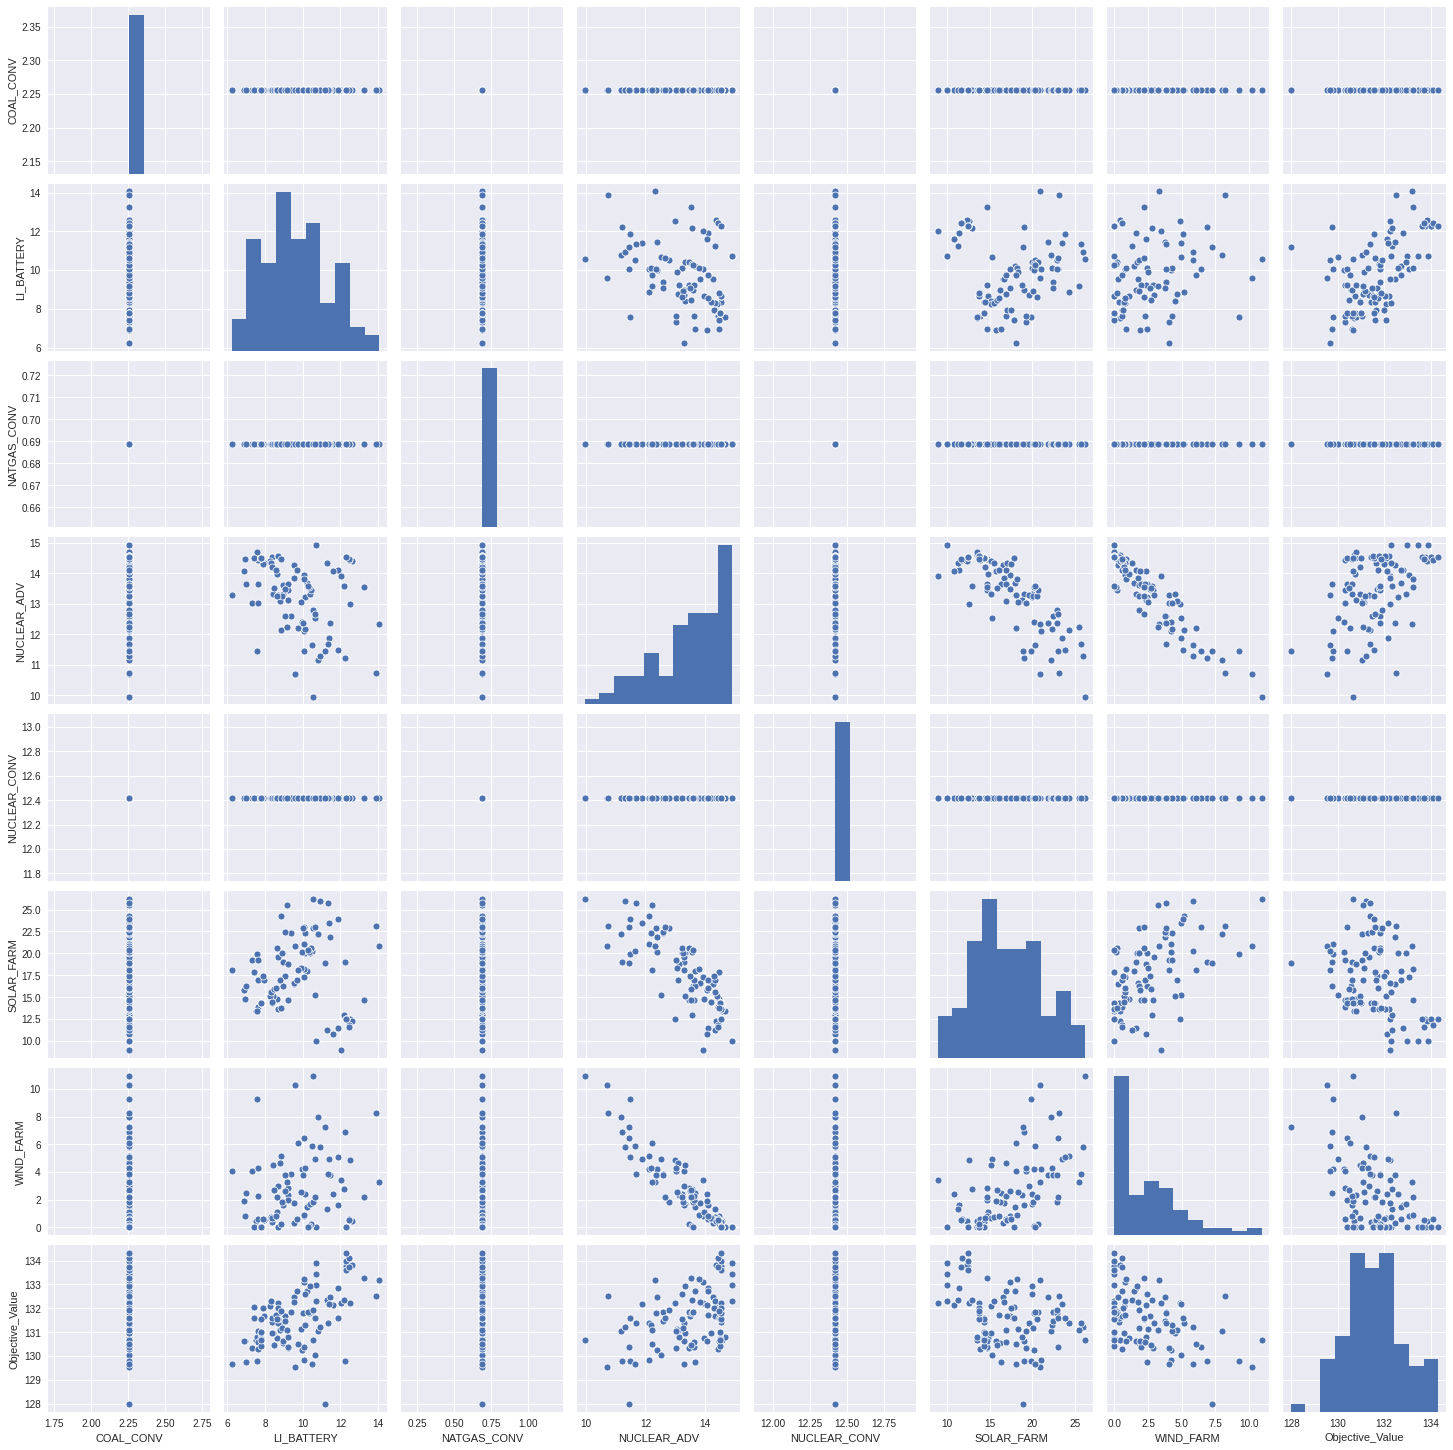

In [21]:
sb.pairplot(df/1000)

In [16]:
conn = sqlite3.connect(data_files[0])
fulldf = get_annual_capacity(conn, region, comm)
for i,file in enumerate(data_files):
    if i == 0:
        continue
    conn = sqlite3.connect(file)
    inter_df = get_annual_capacity(conn, region, comm)
    frames = [fulldf, inter_df]
    fulldf = pd.concat(frames)

In [17]:
fulldf.fillna(0, inplace=True)
fulldf

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM
year,,,,,,,
2025,7505.90,128.1000,16371.60,1226.4259,12420.0,267.2000,6294.8200
2030,5045.24,10068.1670,16332.70,9269.2798,12420.0,6887.7178,5615.4600
2035,2815.74,10052.0870,15903.98,10906.6390,12420.0,7288.8141,3210.6200
2040,2444.40,10160.1800,5023.32,12424.2180,12420.0,7270.8741,1912.2400
2045,2357.04,10036.6220,688.80,14168.9990,12420.0,7073.6341,0.0000
...,...,...,...,...,...,...,...
2030,5045.24,8686.6612,16332.70,8215.7851,12420.0,13475.1550,5615.4600
2035,2815.74,9004.9303,15903.98,9430.0186,12420.0,13454.3350,4998.1787
2040,2444.40,9274.1458,5023.32,10589.5310,12420.0,13436.3950,4969.0348


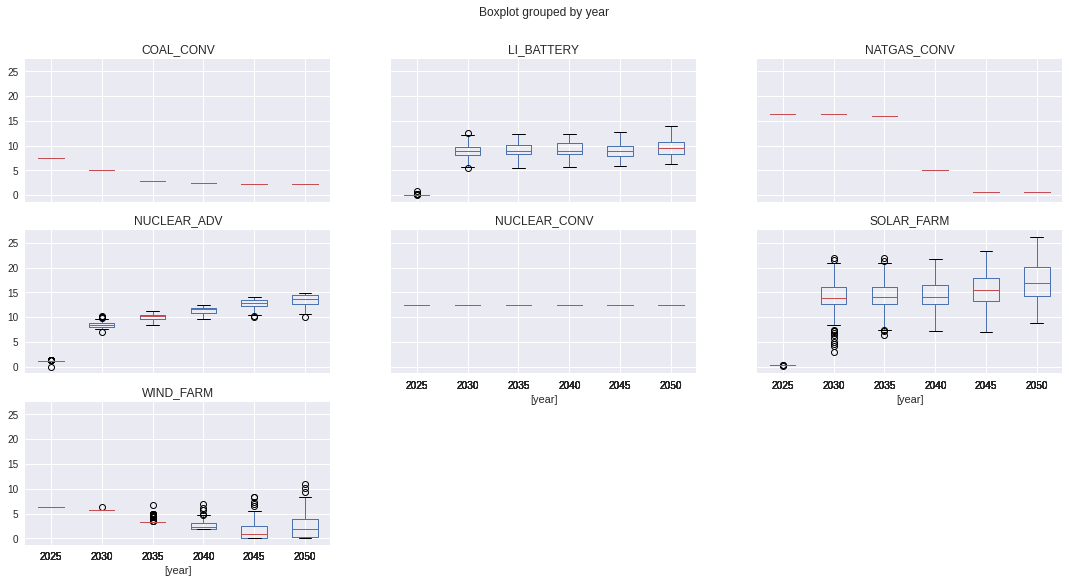

In [18]:
(fulldf/1000).boxplot(by='year', figsize=(18,9))
plt.xlabel('Installed Capacity [GW]')
plt.show()

In [19]:
conn = sqlite3.connect('simulations/illinois/data_files/IL_CC30_52.sqlite')

In [20]:
get_objective(conn)

127976.36003250397

In [25]:
(df[techs]/1000).to_csv('data/results/installed_capacity_2050_LC.csv')
(fulldf[techs]/1000).to_csv('data/results/installed_capacity_full_LC.csv')